
<h1><center>Estudio de probabilidades de un oscilador armónico y anarmónico mediante Matrix Squaring e Integrales de Camino</center></h1>
<h4><center>Ana Cristina Molina - CC.1044508251<br>
Universidad de Antioquia<br>
anac.molina@udea.edu.co</center></h4>

<h5><center> Resumen: <br>
<font size=4> Este es el resumen </center></h5>

## Introducción

Encontrar soluciones analíticas exactas para la matriz densidad es una tarea inviable en muchos sistemas físicos, así, los métodos numéricos se han convertido en una herramienta fundamental para el cálculo de la matriz densidad de manera eficiente y precisa. En particular, la integral de camino y el método de Matrix Squaring son dos métodos numéricos para calcular la matriz densidad de sistemas físicos, para esto tanto el método de Matrix Squaring e Integral de camino usan la fórmula de Trotter para encontrar la distribución de probabilidad del sistema, sin embargo, están limitados a trabajar para altas temperaturas debido a la aproximación de segundo orden.

El oscilador armónico es uno de los modelos más importantes en la física. En física estadística, la función de partición de este sistema se puede obtener en forma analítica lo que permite analizar y predecir no sólo el comportamiento del sistema sino también la precisión y exactitud de métodos numéricos usados para sistemas más complejos.

El objetivo de este trabajo es usar matrix squaring y la integrales de camino para calcular las probabilidades asociadas a partículas que se mueven en potenciales armónicos y anarmónicos y concluir sobre la efectividad de estos para estos problemas, teniendo en cuenta que para uno de ellos se tienen soluciones analíticas y mientras que para el otro no.

In [77]:
# Load libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt

In [78]:
# Configuration for text sizes in plots

MEDIUM_SIZE = 12
BIGGER_SIZE = 12

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)   # fontsize of the figure title

In [79]:
# Define function to read a file with two columns and returns two lists
def read_file(filename):
    
    """Reads a file with two columns and returns two lists
    Args:
        filename (string): name of the file
    Returns:
        list: list of the first column
        list: list of the second column
    """

    # Empty lists
    list_x = []
    list_y = []

    # Open file object
    with open(filename) as f:
        # Read file line by line 
        for line in f:
            x, y = line.split()
            # Append values to lists
            list_x.append(float(x))
            list_y.append(float(y))
    # Close file object
    f.close()
    
    # Return lists
    return list_x, list_y

## Potencial del oscilador armónico

El potencial del oscilador armónico cuántico es:

$$V(x) = \frac{1}{2} x^2$$

este potencial es uno de los potenciales más importantes en física y por lo tanto es uno de los más estudiados. Uno de sus mayores características es que presenta un símetría alreadedor de x=0, lo cual se puede observar en la siguiente figura

In [80]:
# Define the harmonic oscillator potential

def harmonic_potential(x):
    """Quamtum armonic oscillator potential
    
    Args:
        x (float): position of the particle
    Returns:
        float: value of the potential at x"""
    return 0.5*x**2

# Define the anharmonic oscillator potential
def anharmonic_potential(x):
    """Quamtum anharmonic oscillator potential
    
    Args:
        x (float): position of the particle
    Returns:
        float: value of the potential at x"""
    return 0.5*x**2 - x**3 + x**4

# Define rho_free function
def rho_free(x, xp, beta):
    """ Free off-diagonal density matrix 
    Args:
        x (float): position of the particle
        xp (float): prima position of the particle
        beta (float): inverse temperature
    Returns:
        float: value of the density matrix at x and xp and beta
    """
    return np.exp(-(x - xp) ** 2 / (2.0 * beta)) / np.sqrt(2.0 * np.pi * beta)

# Define the density matrix in the Trotter approximation
def rho_harmonic_trotter(grid, beta, potential):
    """ Harmonic density matrix in the Trotter approximation 
    Args:
        grid (float): grid of positions of the particle
        beta (float): inverse temperature
    Returns:
        float: value of the density matrix at x and xp and beta
    """
    return np.array([[rho_free(x, xp, beta) * np.exp(-0.5 * beta * (potential(x) + potential(xp))) #)0.5 * (x ** 2 + xp ** 2))
                      for x in grid] for xp in grid])

# Define theorical probability density function
def analytic_quantum_probability(x, beta):
    """Analytic quantum probability of the harmonic oscillator
    Args:
        x (float): position of the particle
        beta (float): inverse temperature
    Returns:
        float: probability of the particle being at x and beta"""
    return np.sqrt(np.tanh(beta/2.0)/np.pi) * np.exp(- x**2.0 * np.tanh(beta/2.0))

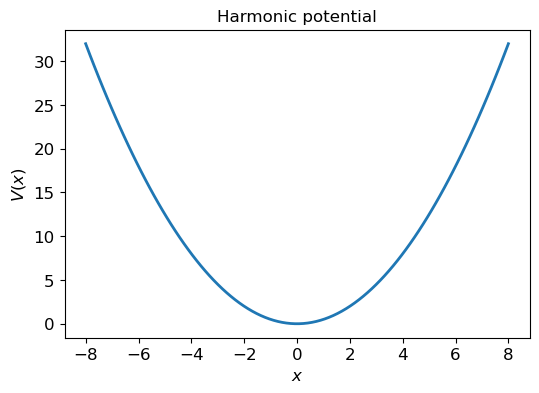

In [81]:
# Plot the potential harmonic oscillator
new_grid = np.linspace(-8, 8, 100)

plt.figure(figsize=(6, 4))
plt.plot(new_grid, harmonic_potential(new_grid), '-', linewidth=2)
plt.xlabel(r'$x$')
plt.ylabel(r'$V(x)$')
plt.title('Harmonic potential');

La función de partición del oscilador armónico cuántico es:

$$
Z(\beta) = \frac{1}{2 \sinh(\beta/2)} 
$$

La probabilidad de encontrar la partícula en la posición $x$ es:

$$
\pi(x) = \sqrt{\frac{\tanh(\beta/2)}{\pi}} e^{-x^2 \tanh(\beta/2)}
$$

## Matrix Squaring

El método de Matrix Squaring  es un método para calcular la matriz densidad en la aproximación de Trotter y la propiedad de convolución de la matriz de densidad.  Para esto se tiene un método iterativo con el cual 
La idea es que la matriz densidad $\rho(x,x',\beta)$ se puede escribir como una serie de potencias de $\beta$:

#### La fórmula de Trotter

La fórmula de Trotter es una ecuación que permite reescribir la matriz densidad de un sistema en términos de la matriz densidad de una partícula libre y la exponencial del potencial del sistema. Notemos, que no hay ninguna restricción sobre el potencial que se debe usar, sin embargo, que notar que este aproximación es válida cuando $\beta \rightarrow 0$, es decir, es una aproximación para altas temperaturas.

$$
\rho(x, x', \beta) \rightarrow e^{-\frac{1}{2}\beta V(x)} \rho^{free}(x, x', \beta) e^{-\frac{1}{2}\beta V(x)}
$$

#### Propiedad de la convolución de la matriz de densidad



$$
\rho(x, x'', 2\beta) = \int dx' \rho(x, x', \beta) \rho(x', x'', \beta)
$$

In [82]:
# Define the convolution function

def convolution(x_max, nx, beta, potential, beta_temp=2.0 ** (-5), return_betas_Zs=False):
    
    """Compute the convolution until reach beta value
    Args:
        x_max (float): maximum value of the position
        nx (int): number of points in the grid
        beta (float): inverse temperature
        potential (function): potential energy function
        beta_temp (float): initial inverse temperature
        return_betas_Zs (bool): if True, return the list of betas and Zs computed
    Returns:
        x (float): grid of positions
        dx (float): differential of x
        rho (float): density matrix
        Z (float): partition function
        pi_of_x (float): probability of the particle being at x    
    """

    dx = 2.0 * x_max / (nx - 1) # Compute the differential of x
    x = np.array([i * dx for i in range(-(nx - 1) // 2, nx // 2 + 1)]) # Compute the grid of positions

    if return_betas_Zs: # If return_betas_Zs is True, then we will return the list of betas and Zs computed
        betas = []
        Zs = []

    # Initial density matrix with beta_temp
    rho = rho_harmonic_trotter(x, beta_temp, potential)
    
    # Compute the convolution until reach beta value
    while beta_temp < beta:
        rho = np.dot(rho, rho)
        rho *= dx
    
        # If return_betas_Zs is True, then we will return the list of betas and Zs computed
        if return_betas_Zs:
            Z = sum(rho[j, j] for j in range(nx + 1)) * dx
            betas.append(beta_temp)
            Zs.append(Z)

        beta_temp *= 2.0

    # Compute the partition function and the probability of the particle being at x
    Z = sum(rho[j, j] for j in range(nx + 1)) * dx
    pi_of_x = np.array([rho[j, j] / Z for j in range(nx + 1)])

    # If return_betas_Zs is True, then we will return the list of betas and Zs computed
    if return_betas_Zs:
        return x, dx, rho, betas, Zs
    # If return_betas_Zs is False, then we will return the partition function and the probability of the particle being at x
    else:
        return x, dx, rho, Z, pi_of_x

### $\pi(x)$ cuando $\beta = 4$ para un oscilador armónico

In [83]:
x_max = 5.0                              # maximum value of the position
nx = 100                                 # number of points in the grid
beta = 4.0                               # inverse temperature

x, dx, rho, Z, pi_of_x = convolution( x_max, nx, beta, harmonic_potential)

(-2.0, 2.0)

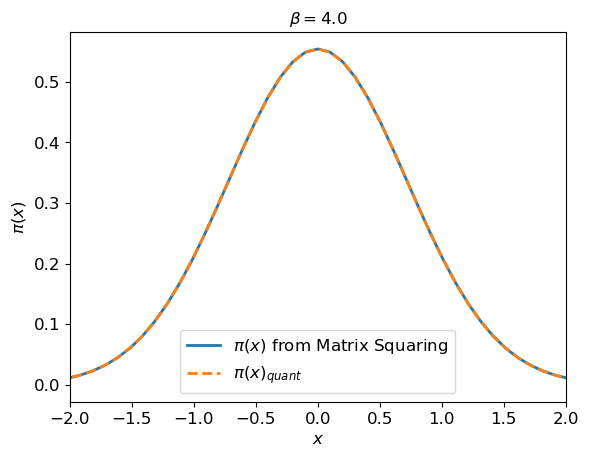

In [84]:
f = open('data_harm_matrix_squaring_beta' + str(beta) + '.dat', 'w')
for j in range(nx + 1):
    f.write(str(x[j]) + ' ' + str(rho[j, j] / Z) + '\n')
f.close()

plt.figsize=(6, 4)
plt.title(r'$\beta = %s$' % beta)
plt.plot(x, pi_of_x, linewidth=2, label='$\pi(x)$ from Matrix Squaring')
plt.plot(x, [analytic_quantum_probability(x, beta) for x in x], '--', linewidth=2, label='$\pi(x)_{quant}$')
plt.legend()
plt.xlabel(r'$x$')
plt.ylabel(r'$\pi(x)$')
plt.xlim(-2, 2)

De la figura anterior se puede observar que la probabilidad teórica es igual a la probabilidad obtenida con el método de Matrix Squaring. Además, $\beta = 4$ es T = $0.25$ K. Esto significa que estamos tratando temperatura muy bajas, por lo cual el sistema se puede describir mejor como un sistema cuántico. A pesar de que la formula de Trotter es una aproximación para altas temperaturas vemos que funciona bien para encontrar la probabilidad del oscilador armónico cuando $T=0.25$ K

Se tiene que la matriz densidad del oscilador armónico cuántico $\rho(x, x, \beta)$ es casi clásica a alta temperatura. Esto se puede demostrar usando el valor teórico de la matriz densidad para el oscilador armónico cuántico

$$
\pi_{quant}(x) = \sqrt{\tanh(\beta/2)/\pi} \exp{(-x^2 \tanh
(\beta/2))}
$$

pues, cuando se tienen temperaturas altas implica que $\beta \rightarrow 0$, $\tanh(\beta/2) \rightarrow \beta/2$. Reemplazando esto en la probabilidad se llega a que

$$
\pi_{class}(x) = \sqrt{\beta/(2\pi)} \exp{(-x^2 \frac{\beta}{2})}
$$

la cual es la fórmula para la probabilidad clásica.

### Exploración de parámetros $dx$ y $\beta$ temp

#### Variando dx a partir de x_max y usando $\beta = 4$ fijo

Text(0.5, 0.98, 'Variation of $dx$ fixing $\\beta = 4$')

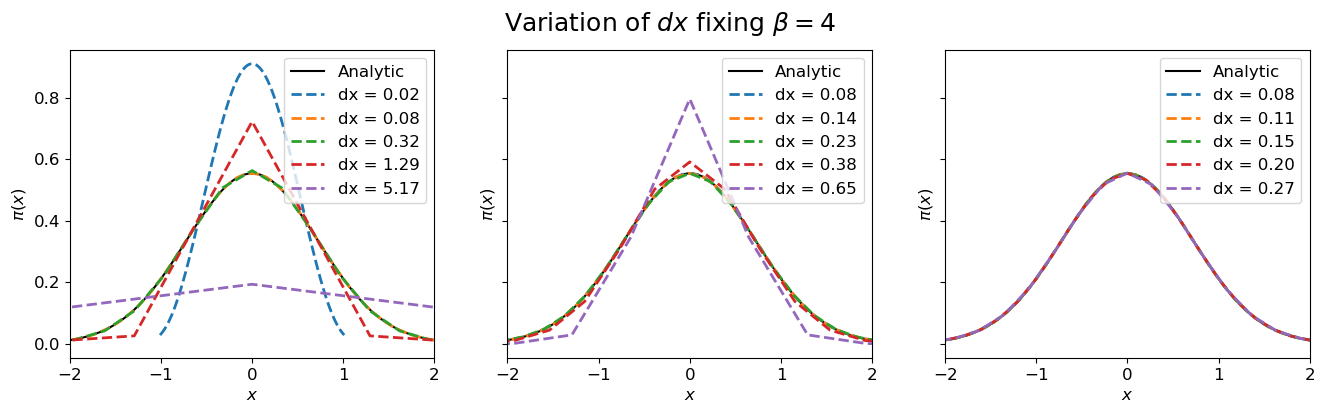

In [85]:
beta = 4.0                               # inverse temperature

xs_maxs = [2**np.linspace(0, 8, 5), 2**np.linspace(2, 5, 5), 2**np.linspace(2, 3.75, 5)]

fig, axs = plt.subplots(1, len(xs_maxs), figsize=(16, 4), sharey=True)
fig.suptitle(r'$\beta = {:.1f}$'.format(beta), fontsize=BIGGER_SIZE*1.5)

grid = np.linspace(-3, 3, 100)

last_pi_of_x = []
i = 0
for x_maxs, ax in zip(xs_maxs, axs):
    
    ax.plot(grid, [analytic_quantum_probability(d, beta) for d in grid], 'k-', label='Analytic')

    for x_max in x_maxs:
   
        x, dx, rho, Z, pi_of_x = convolution(x_max, nx, beta, harmonic_potential)
        
        if i==len(xs_maxs)-1:
            last_pi_of_x.append([dx, x, pi_of_x]) 

        ax.plot(x, pi_of_x, '--', linewidth=2, label='dx = {:.2f}'.format(dx))

        ax.legend()
        ax.set_xlabel(r'$x$')
        ax.set_ylabel(r'$\pi(x)$')
        ax.set_xlim(-2, 2)

    i += 1

fig.suptitle(r'Variation of $dx$ fixing $\beta = 4$', fontsize=BIGGER_SIZE*1.5)

En este caso, se dejó fijo el valor de $\beta = 4$ para explorar cuales son los valores de dx que permiten calcular la $\pi(x)$ mediante matrix squaring. Se observa que para valore de $dx$ entre 0.02 y 5.17 los valores que mejor calculan la probabilidad están entre 0.08 y 0.27.

In [86]:
last_pi_of_x = np.array(last_pi_of_x)

Text(0.5, 1.0, 'Difference between numerical and theorical $\\pi(x)$')

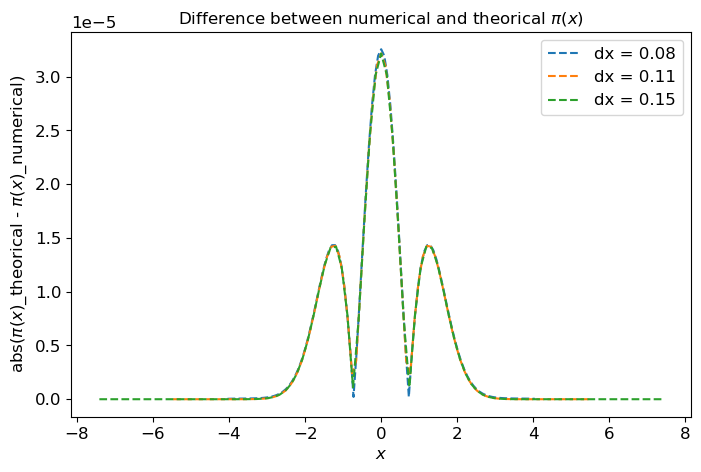

In [87]:
plt.figure(figsize=(8, 5))
for i in range(0, len(last_pi_of_x)-2):
    theorical = [analytic_quantum_probability(d, beta) for d in last_pi_of_x[i][1]]
    plt.plot(last_pi_of_x[i][1], abs(theorical-last_pi_of_x[i][2]), '--', label='dx = {:.2f}'.format(last_pi_of_x[i][0]))
plt.legend()
plt.xlabel(r'$x$')
plt.ylabel(r'abs($\pi(x)$_theorical - $\pi(x)$_numerical)')
plt.title(r'Difference between numerical and theorical $\pi(x)$')

De hecho, calculando la diferencia entre la probabilidad analítica y la probabilidad numérica, se puede observar que la diferencia es menor a $10^{-5}$ para $dx$ entre 0.08 y 0.15. Por lo tanto, se puede concluir que el valor de $dx$ óptimo se encuentra en ese rango. 

#### Variando $\beta$ temp usando un x_max fijo

In [88]:
Z_theoric = lambda beta: 1/(2*np.sinh(beta/2))

Text(0.5, 0.98, 'Variation of $\\beta_{init}$')

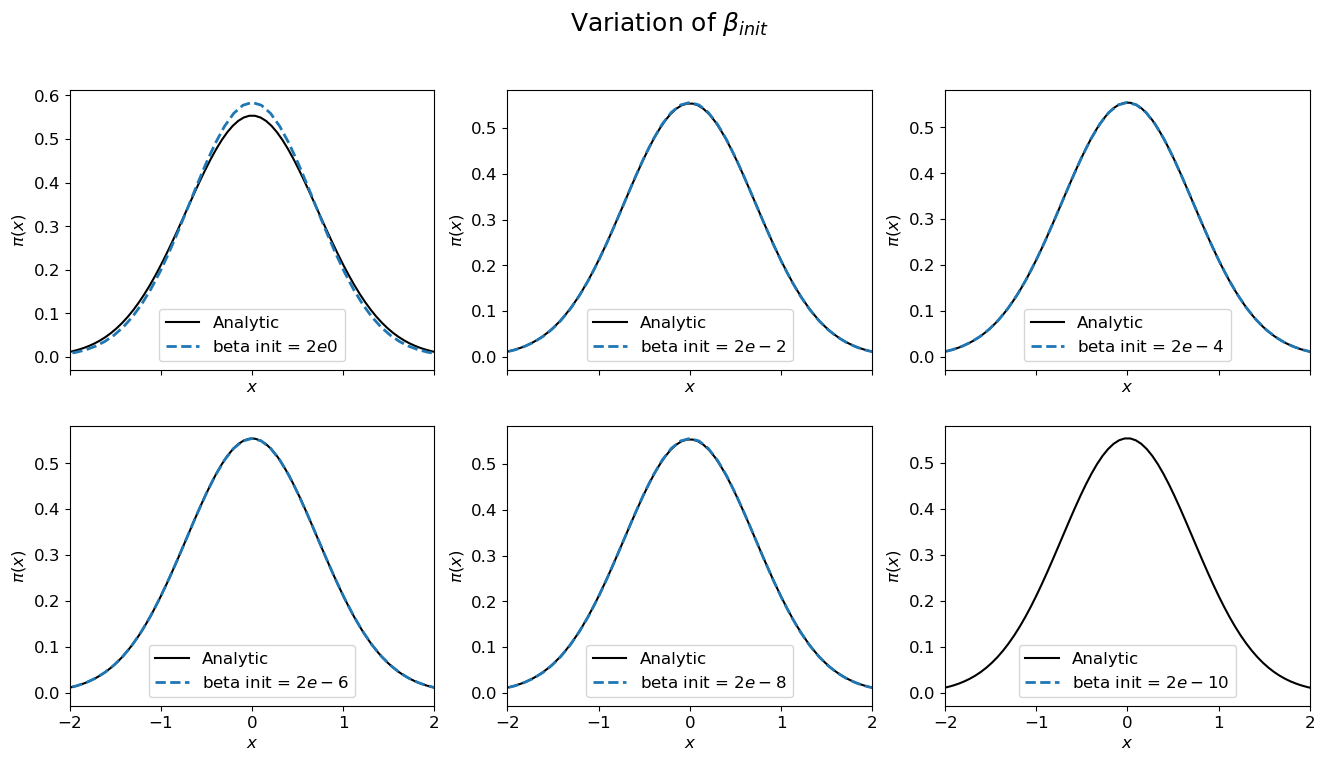

In [89]:
nx = 100                               # number of points in the grid
x_max = 5.0                             # inverse temperature
beta = 4.0                               # inverse temperature

fig, axs = plt.subplots(2, 3, figsize=(16, 8), sharex=True)
axs = axs.ravel()

for i, ax in zip(range(0, 12, 2), axs):

    ax.plot(grid, [analytic_quantum_probability(d, beta) for d in grid], 'k-', label='Analytic')
    x, dx, rho, Z, pi_of_x = convolution(x_max, nx, 
                                        beta, 
                                        harmonic_potential, 
                                        beta_temp=2.0 ** (-i), 
                                        )
    
    ax.plot(x, pi_of_x, '--', linewidth=2, label='beta init = $2e{:d}$'.format(-i))
    ax.legend()
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$\pi(x)$')
    ax.set_xlim(-2, 2)

fig.suptitle(r'Variation of $\beta_{init}$', fontsize=BIGGER_SIZE*1.5)

In [90]:
print(dx)

0.10101010101010101


También se hizo una exploración sobre los valores de $\beta$ inicial, donde los $\beta$ eran potencias de 2 y cuyo rango de valores fue de $2e-0$ a $2e-10$. En este caso de dejo fijo el valor de $dx=$ Se observó que a medida que el $\beta$ inicial disminuyó, la función de probabilidad se acercaba más a la función analítica, sin embargo, para valores pequeños del orden de $1e-10$ ya no se pudo calcular en la función de probabilidad debido a que numéricamente se hacía NaN. El rango de valores de $\beta$ para los cuales de obtuvieron mejores resultados entre $2e-2$ y $2e-8$. En comparación con la variación anterior

In [91]:
nx = 100                               # number of points in the grid
x_max = 5.0                             # inverse temperature

n_plots = 5
betas = 2.0 ** np.linspace(0.01, 10, 10)

Z_values = []

for beta in betas:
   
    x, dx, rho, Z, pi_of_x = convolution(x_max, nx, beta, harmonic_potential, beta_temp=2.0 ** (-6))
    Z_values.append(Z)

In [92]:
m, b = np.polyfit(betas, np.log(Z_values), 1)

Text(0.55, 0.55, '$\\langle E \\rangle = 0.5$')

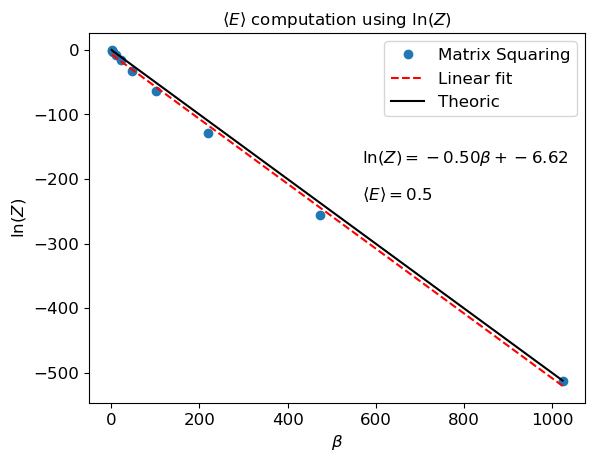

In [93]:
plt.plot(betas, np.log(Z_values), 'o', label='Matrix Squaring')
plt.plot(betas, m*betas+b, 'r--', label='Linear fit')
plt.plot(betas, np.log(Z_theoric(betas)), 'k-', label='Theoric')
plt.xlabel(r'$\beta$')
plt.ylabel(r'$\ln(Z)$')
plt.legend()
plt.title(r'$\langle E \rangle$ computation using $\ln(Z)$')
plt.text(0.55, 0.65, r'$\ln(Z) = {:.2f} \beta + {:.2f}$'.format(m, b), transform=plt.gca().transAxes)
plt.text(0.55, 0.55, r'$\langle E \rangle = 0.5$', transform=plt.gca().transAxes)

Se pudo encontrar una relación lineal entre $\ln(Z)$ y $\beta$. El valor medio de la energía se puede calcular como:

$$\langle E \rangle = - \frac{\partial \ln(Z)}{\partial \beta}$$

por lo cual, se puede calcular la energía media usando la pendiente de la recta anterior. Además, usando la función particion dada por:

$$Z = \frac{1}{2 \sinh(\beta/2)}$$

y graficando $\ln(Z)$ vs $\beta$, se puede encontrar que se obtiene una recta con pendiente $1/2$. De tal forma, que ambas pendientes son iguales, por lo cual se puede concluir que el método numérico es correcto.

Recordemos que la energía del oscilador armónico cuántico está dada por:

$$E_n = \left(n + \frac{1}{2}\right)$$

donde $n$ es el número cuántico. Así, encontramos que cuando $n=0$ entonces se obtiene la energía media del sistema, además, lo que indica que la energía media del sistema y la energía del estado fundamental son iguales.

## Integrales de Camino (Path Integral)

In [94]:
# Define the path integral Monte Carlo algorithm

def path_integral(potential, beta, N, delta, n_steps):
    """Path integral Monte Carlo algorithm
    Args:
        potential (function): potential energy function
        beta (float): inverse temperature
        N (int): number of paths
        delta (float): maximum displacement
        n_steps (int): number of steps
    Returns:
        list: first path
        list: k-th path
        list: all paths
    """
    dtau = beta / N
    x = [0.0] * N

    x_0 = []
    x_k = []
    xs = []

    for step in range(n_steps):
        k = np.random.randint(0, N)
        knext, kprev = (k + 1) % N, (k - 1) % N

        x_new = x[k] + np.random.uniform(-delta, delta)

        old_weight  = (rho_free(x[knext], x[k], dtau) * rho_free(x[k], x[kprev], dtau) * np.exp(- dtau * potential(x[k])) )
        new_weight  = (rho_free(x[knext], x_new, dtau) * rho_free(x_new, x[kprev], dtau) * np.exp(-  dtau * potential(x_new)) ) 

        if np.random.uniform(0.0, 1.0) < (new_weight / old_weight):
            x[k] = x_new


        if step%10 == 0:
            
            xs.append(x.copy())

            x_0.append(x[0])
            x_k.append(x[4])
        
    return x_0, x_k, np.array(xs)

### $\pi(x)$ cuando $\beta = 4$ para un oscilador armónico usando integrales de camino

In [95]:
beta = 4.0 
N = 10
delta = 1.0
n_steps = 500000

x_0, x_k, xs = path_integral(harmonic_potential, beta, N, delta, n_steps)

Text(0.5, 1.0, 'Path integral Harmonic Oscillator, $\\beta = 4.0$')

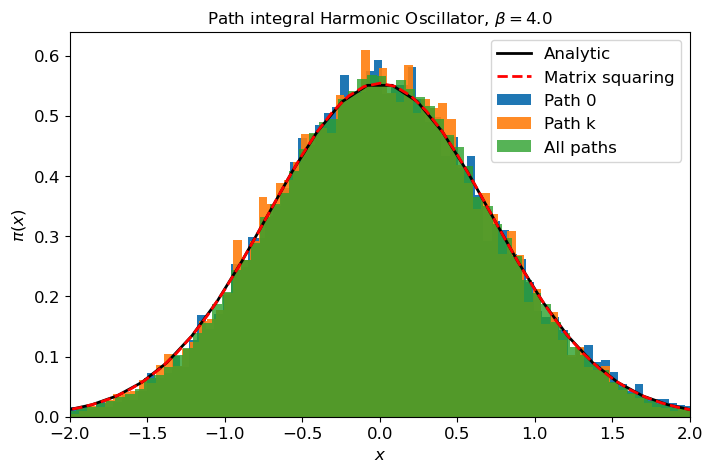

In [96]:
list_x, list_y = read_file('data_harm_matrix_squaring_beta4.0.dat')

plt.figure(figsize=(8, 5))
plt.plot(new_grid, [analytic_quantum_probability(x, beta) for x in new_grid], 'k-', linewidth=2, label='Analytic')
plt.plot(list_x, list_y, 'r--', linewidth=2, label='Matrix squaring')
plt.hist(x_0, density=True, bins=100, alpha=1, label='Path 0')
plt.hist(x_k, density=True, bins=100, alpha=0.9, label='Path k')
plt.hist(xs.flatten(), density=True, bins=100, alpha=0.8, label='All paths')
plt.legend()
plt.xlim(-2, 2) 
plt.xlabel(r'$x$')
plt.ylabel(r'$\pi(x)$')
plt.title(r'Path integral Harmonic Oscillator, $\beta = 4.0$')

De la gráfica anterior que tanto el método de Monte Carlo como el de Matrix Squaring son muy buenos para calcular la función de probabilidad cuántica. Ambos métodos son rápidos, sin embargo, es importante nota que el método de Matrix Squaring es más rápido que el de Monte Carlo. Esto se debe a que el método de Monte Carlo tiene un tiempo de ejecución de $O(N)$, mientras que el de Matrix Squaring es de $O(N^3)$.

Se puede observar de la gráfica anterior que tanto las distribuciones de la posiciones para los caminos x[0] y x[k] construyen la distribución de probabilidad teórica, que como se vió previamente coincide con la distribución de probabilidad que se calculó mediante convolución. 

## Potencial de un oscilador anarmónico

Los osciladores anarmónicos son osciladores cuyo potencial no es cuadrático, es decir, incluye términos de orden superior al cuadrático.

$$
V(x) = \frac{1}{2} x^{2} - x^3 + x^4
$$

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Anharmonic potential')

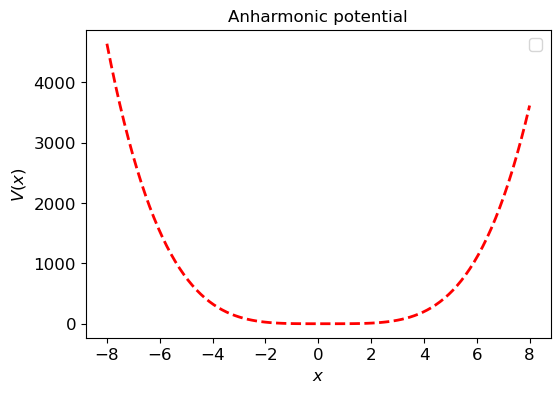

In [97]:
plt.figure(figsize=(6, 4))
plt.plot(new_grid, anharmonic_potential(new_grid), 'r--', linewidth=2)
plt.legend()
plt.xlabel(r'$x$')
plt.ylabel(r'$V(x)$')
plt.title(r'Anharmonic potential')

Los potenciales anarmónicos ya n

(-2.0, 2.0)

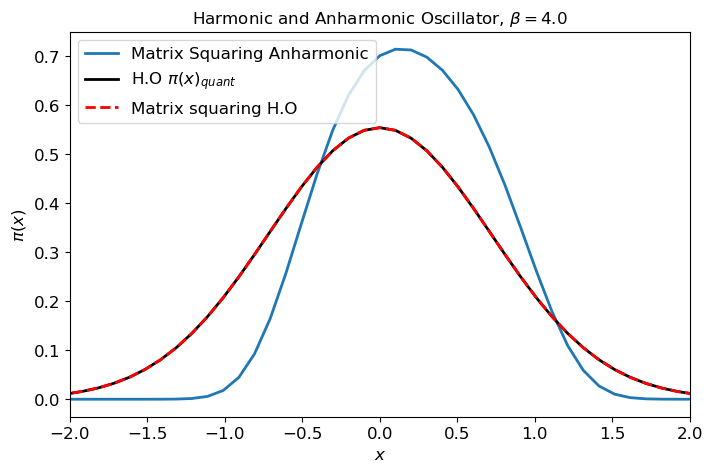

In [98]:
# Fixing parameters
x_max = 5.0                              # maximum value of the position
nx = 100                                # number of points in the grid
beta = 4.0                               # inverse temperature

# Compute the convolution for anharmonic potential
x, dx, rho, Z, pi_of_x = convolution(x_max, nx, beta, anharmonic_potential, True)

# Save the data in a file for plotting
f = open('data_anharm_matrix_squaring_beta' + str(beta) + '.dat', 'w')
for j in range(nx + 1):
    f.write(str(x[j]) + ' ' + str(rho[j, j] / Z) + '\n')
f.close()

# Plot the results
plt.figure(figsize=(8, 5))
plt.title(r'Harmonic and Anharmonic Oscillator, $\beta = 4.0$')
plt.plot(x, pi_of_x, linewidth=2, label='Matrix Squaring Anharmonic')
plt.plot(x, [analytic_quantum_probability(x, beta) for x in x], 'k-', linewidth=2, label='H.O $\pi(x)_{quant}$')
plt.plot(list_x, list_y, 'r--', linewidth=2, label='Matrix squaring H.O') 
plt.legend()
plt.xlabel(r'$x$')
plt.ylabel(r'$\pi(x)$')
plt.xlim(-2, 2)

En la figura anterior se puede observar la gŕafica de la probabilidad para el oscilador armónico y anarmónico obtenida por medio del método de Matrix Squaring, de igual forma se dibujo la expresión analítica de la probabilidad del oscilador armónico. Se puede observar que la probabilidad  del oscilador anarmónico es más ancha que la del oscilador armónico, esto se debe a que el oscilador anarmónico tiene un potencial más fuerte que el armónico, por lo que la probabilidad cuántica se extiende más en el espacio de configuraciones.

In [99]:
N = 10
delta = 1.0
n_steps = 500000

x_0, x_k, xs = path_integral(anharmonic_potential, beta, N, delta, n_steps)

Text(0.5, 1.0, 'Path integral Anharmonic Oscillator, $\\beta = 4.0$')

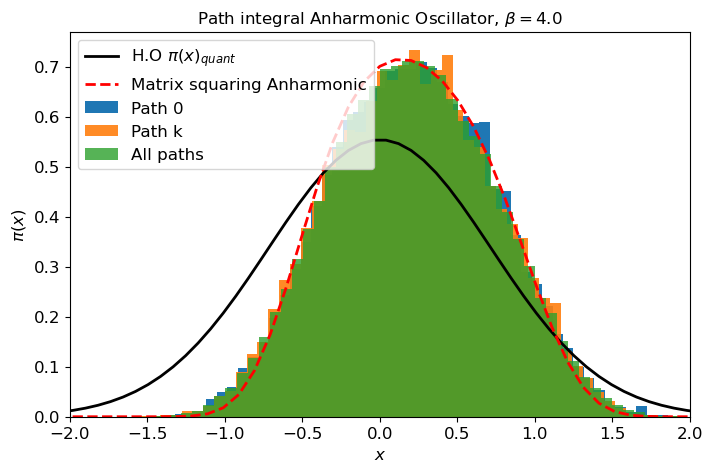

In [100]:
list_x, list_y = read_file('data_anharm_matrix_squaring_beta4.0.dat')

plt.figure(figsize=(8, 5))
new_grid = np.linspace(-4, 4, 100)
plt.plot(new_grid, [analytic_quantum_probability(x, beta) for x in new_grid], 'k-', linewidth=2, label='H.O $\pi(x)_{quant}$')
plt.plot(list_x, list_y, 'r--', linewidth=2, label='Matrix squaring Anharmonic')
plt.hist(x_0, density=True, bins=50, alpha=1, label='Path 0')
plt.hist(x_k, density=True, bins=50, alpha=0.9, label='Path k')
plt.hist(xs.flatten(), density=True, bins=50, alpha=0.8, label='All paths')
plt.legend()
plt.xlim(-2, 2) 
plt.xlabel(r'$x$')
plt.ylabel(r'$\pi(x)$')
plt.title(r'Path integral Anharmonic Oscillator, $\beta = {:.1f}$'.format(beta))

- Realice también las comparaciones de $\pi(x)$ entre un
potencial armónico y uno anarmónico en la misma gráfica para los
programas de las secciones matrix-squaring y path-integral.

En las gráficas anterior se tiene que $\pi(x)$ para el potencial anarmónico puede ser calculado tanto por el método de matrix squaring como también por el método de integrales de camino. Tal y como se observó para el oscilador armónico, estos dos métodos son herramientas fundamentales para calcular probabilidades de sistemas más complejos que el oscilador armónico. Esto se ejemplifica con el potencial anarmónico, el cual se desconoce el valor teórico de la probabilidad pero cuyo porbabilidad puede ser estimada por medio de métodos númericos. Ahora, cuando se commparan las probabilidades de los potenciales armónicos y anarmónicos se observa un deplazamiento hacia el eje positivo x por parte de potencial anarmónico, se ve entonces que los terminos adiciones del potencial modifican la simetría inicial de potencial armónico y por tanto también modifican la simetria de las distribuciones de probabilidad.

Es importante notar que se tiene los caminos per se pueden muestrear 

## Conclusiones

- El método de Matrix Squaring permite calcular de forma rápida y eficiente la matriz densidad para 